# 방송사 시청률 받아오기
----------
지난 시간에 DataFrame에서 원하는 부분을 선택하는 인덱싱을 배웠는데요. 

이를 통해서 값을 찾는 연습을 해봅시다.


2016년도에 KBS방송국의 시청률을 찾아봅시다.


데이터를 한번 잘 살펴보고 어떻게 값을 찾아야 할지 고민해보세요!


In [1]:
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)
df.loc[2016, 'KBS']

27.583000000000002

---------
이번에는 DataFrame에서 한 줄을 찾는 연습을 해보겠습니다.
JTBC의 시청률을 확인하려면 어떻게 해야 할까요?

--------

In [2]:
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)

print(df.loc[:, 'JTBC'])
df['JTBC']

2011    7.380
2012    7.878
2013    7.810
2014    7.490
2015    7.267
2016    7.727
2017    9.453
Name: JTBC, dtype: float64


2011    7.380
2012    7.878
2013    7.810
2014    7.490
2015    7.267
2016    7.727
2017    9.453
Name: JTBC, dtype: float64

--------
이번에는 DataFrame에서 여러 줄을 찾는 연습을 해보겠습니다. 

SBS와 JTBC의 시청률만 확인하려면 어떻게 하면 될까요?

----

In [3]:
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)


print(df.loc[:, ["SBS", "JTBC"]])
df[['SBS', 'JTBC']]

         SBS   JTBC
2011  11.173  7.380
2012  11.408  7.878
2013   9.673  7.810
2014   9.108  7.490
2015   9.099  7.267
2016   8.669  7.727
2017   8.661  9.453


,SBS,JTBC
2011,11.173,7.380
2012,11.408,7.878
2013,9.673,7.810
2014,9.108,7.490
2015,9.099,7.267
2016,8.669,7.727
2017,8.661,9.453


카드사 고객 분석
-------------------------------
데이터의 중요성을 깨달은 “삼송카드”와 “현디카드”가 협업을 하기로 결정했습니다.



두 카드사는 사람들이 요일별로 지출하는 평균 금액을 “요일”, “식비", “교통비”, “문화생활비”, “기타” 카테고리로 정리해서 우리에게 공유해 주기로 했는데요. 각각 samsong.csv 파일과 hyundee.csv 파일을 보냈습니다.



두 회사의 데이터를 활용해서, 사람들의 요일별 문화생활비를 분석해보려 합니다. 아래와 같은 형태로 출력이 되도록 DataFrame을 만들어보세요.

In [4]:
import pandas as pd

hyun = pd.read_csv('data/hyundee.csv')
sam = pd.read_csv('data/samsong.csv')

hyun_s = hyun['문화생활비']
sam_s = sam['문화생활비']

days = sam['요일']

dict1 = {
    'day' : days,
    'samsong' : sam_s,
    'hyundee' : hyun_s,
}

pd.DataFrame(dict1)


,day,samsong,hyundee
0,MON,4308,5339
1,TUE,7644,3524
2,WED,5674,5364
3,THU,8621,9942
4,FRI,23052,33511
5,SAT,15330,19397
6,SUN,19030,19925


### 이번엔 DataFrame에서 연속된 여러 줄을 찾는 연습을 해보겠습니다.

----------
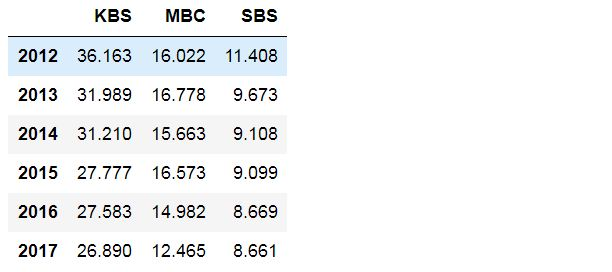


방송사는 'KBS'에서 'SBS'까지, 

연도는 2012년부터 2017년까지의 시청률만 확인하려면 어떻게 하면 될까요?

In [5]:
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)
df.loc[2012 : 2017, 'KBS' : 'SBS'] 

,KBS,MBC,SBS
2012,36.163,16.022,11.408
2013,31.989,16.778,9.673
2014,31.210,15.663,9.108
2015,27.777,16.573,9.099
2016,27.583,14.982,8.669
2017,26.890,12.465,8.661


이번에는 DataFrame에서 조건에 해당하는 데이터를 찾는 연습을 해보겠습니다.
---


'KBS'에서 시청률이 30이 넘은 데이터만 확인해보려면 어떻게 하면 될까요?

```
2011    35.951
2012    36.163
2013    31.989
2014    31.210
Name: KBS, dtype: float64```


In [6]:
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)
kbs = df.loc[:, 'KBS']
df2 = df['KBS']
df2[kbs > 30]

2011    35.951
2012    36.163
2013    31.989
2014    31.210
Name: KBS, dtype: float64

In [7]:
# 다른 답
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)
boolean_KBS = df['KBS'] > 30
print(df.loc[boolean_KBS]) # 여기서는 KBS 조건에 맞는 행을 추출하여 모든 열을 보여줌
                           # 즉, 행으로만 슬라이싱한 것이다.

df.loc[boolean_KBS, 'KBS'] # 이렇게 해야 row까지 슬라이싱

         KBS     MBC     SBS  TV CHOSUN   JTBC  Channel A    MBN
2011  35.951  18.374  11.173      9.102  7.380      3.771  2.809
2012  36.163  16.022  11.408      8.785  7.878      5.874  3.310
2013  31.989  16.778   9.673      9.026  7.810      5.350  3.825
2014  31.210  15.663   9.108      9.440  7.490      5.776  4.572


2011    35.951
2012    36.163
2013    31.989
2014    31.210
Name: KBS, dtype: float64

이번에는 좀 더 DataFrame을 다방면으로 분석해봅시다.
---

주어진 데이터에서 SBS가 TV CHOSUN보다 더 시청률이 낮았던 시기의 데이터를 확인해보려고 합니다.


어떻게 하면 될까요?


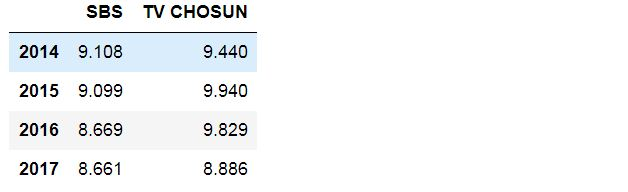

In [8]:
import pandas as pd

df = pd.read_csv('data/broadcast.csv', index_col=0)

boolyn = df['SBS'] < df['TV CHOSUN']
df.loc[boolyn, ['SBS', 'TV CHOSUN']]

,SBS,TV CHOSUN
2014,9.108,9.440
2015,9.099,9.940
2016,8.669,9.829
2017,8.661,8.886
